In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv('supply_chain_data.csv')

# EDA

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

Key Features:

Product type: The category or type of product.

SKU: Stock Keeping Unit, a unique identifier for each product.

Price: The selling price of the product.

Availability: Indicates whether the product is in stock or out of stock.

Number of products sold: The quantity of products sold.

Revenue generated: Total revenue earned from the sales of the product.

Customer demographics: Characteristics of the customers (e.g., age, gender, region).

Stock levels: Current inventory levels.

Lead times: Time taken between ordering and receiving a product.

Order quantities: The amount ordered by customers.

Shipping times: Time required to ship products to customers.

Shipping carriers: Companies responsible for delivering the products.

Shipping costs: Expenses associated with shipping the products.

Supplier name: The name of the product supplier.

Location: Location details related to the supplier or manufacturing.

Lead time: The production or procurement duration.

Production volumes: The amount of product manufactured.

Manufacturing lead time: Time taken to manufacture the product.

Manufacturing costs: Costs incurred during the production process.

Inspection results: Outcomes of quality checks.

Defect rates: Percentage of defective products.

Transportation modes: Methods used for transporting goods (e.g., air, road, sea).

Routes: Shipping or delivery routes.

Costs: Expenses related to transportation or other operations


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
data.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['Net_Profit']=data['Revenue generated']-(data['Shipping costs']+data['Manufacturing costs']+data['Costs'])

In [9]:
correlation=data.corr(numeric_only=True)
correlation

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Net_Profit
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501,0.031820
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315,-0.073659
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951,0.001439
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252,0.995514
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088,-0.157090
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686,-0.079612
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306,0.013830
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541,-0.104812
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671,-0.078474
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219,-0.017114


In [10]:
summary_stats=data.describe()
summary_stats

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Net_Profit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782,5193.987563
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696,2744.510870
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248,739.849765
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455,2312.805146
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444,5356.929512
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231,7639.571804
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450,9397.086845


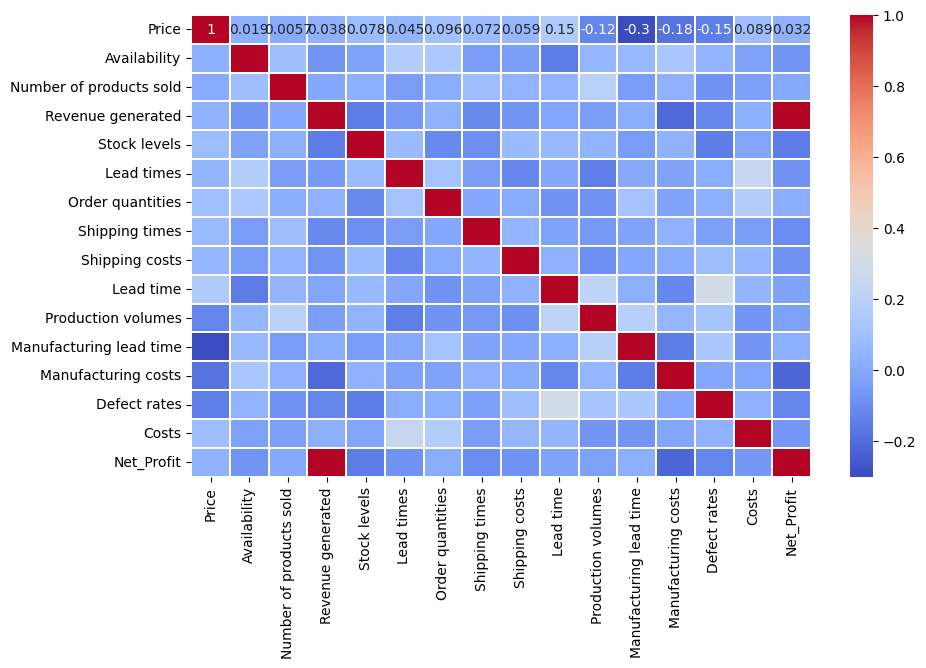

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cmap='coolwarm',annot=True, linewidths=0.1)
plt.show()

DATA VISUALISATION

In [12]:
Product=data.groupby('Product type')
Customer=data.groupby('Customer demographics')
Routes=data.groupby('Routes')
Shipping=data.groupby('Shipping carriers')
Location=data.groupby('Location')
Transportation=data.groupby('Transportation modes')
Supplier=data.groupby('Supplier name')

PRODUCT ANALYSIS

In [13]:
defects=data.groupby('Product type')['Defect rates'].mean().reset_index()

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig_revenue1 = px.bar(Product["Revenue generated"].sum(), y="Revenue generated", title="Revenue Generated")
fig_profit1 = px.bar(Product['Net_Profit'].sum(), y="Net_Profit", title="Profit")
fig_orders1 = px.bar(Product['Order quantities'].sum(), y="Order quantities", title="Order Quantities")
fig_costs1 = px.bar(Product['Manufacturing costs'].sum(), y="Manufacturing costs", title="Manufacturing Costs")
fig_stock1 = px.bar(data, x="Product type", y="Stock levels", title="Stock Levels")
fig_defects1=px.bar(defects,x='Product type',y='Defect rates',title='Defect Rates')
fig_pie1 = px.pie(data, names="Product type", values="Number of products sold", title="Products Sold Distribution")


fig= make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}], 
           [{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=[
        "Revenue Generated", "Profit", "Order Quantities", 
        "Manufacturing Costs", 'Defect Rates',"Products Sold Distribution"
    ]
)

for trace in fig_revenue1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_profit1.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_orders1.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig_costs1.data:
    fig.add_trace(trace, row=2, col=2)
for trace in fig_defects1.data:
    fig.add_trace(trace, row=3, col=1)
for trace in fig_pie1.data:
    fig.add_trace(trace, row=3, col=2)
    
fig.update_layout(
    height=1200, width=800,
    title_text="Product Metrics & Distribution",
    showlegend=False
)

fig.show()

Customer analysis

In [15]:
fig2=px.bar(Customer["Number of products sold"].sum(),y="Number of products sold")
fig2=px.bar(Customer['Net_Profit'].sum(),y="Net_Profit")
fig2=px.bar(data,x="Customer demographics",y="SKU",color="Product type")
fig2=px.bar(Customer['Order quantities'].sum(),y="Order quantities")

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}], 
           [{"type": "bar"}, {"type": "bar"}]]
    ,
    subplot_titles=[
        "Number of products sold", "Net Profit","SKU","Order Quantities"
    ]
)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig2.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=2, col=2)
    
fig.update_layout(
    height=1200, width=800,
    title_text="Customer demographics",
    showlegend=False
)

fig.show()

In [16]:
Customer_Segment_by_Products= data.groupby(["Customer demographics","Product type"])["SKU"].count().reset_index()
Customer_Segment_by_Products

,Customer demographics,Product type,SKU
0,Female,cosmetics,10
1,Female,haircare,2
2,Female,skincare,13
3,Male,cosmetics,4
4,Male,haircare,10
5,Male,skincare,7
6,Non-binary,cosmetics,5
7,Non-binary,haircare,7
8,Non-binary,skincare,11
9,Unknown,cosmetics,7


Routes analysis

In [17]:
fig_revenue3 = px.bar(Routes["Revenue generated"].sum(), y="Revenue generated", title="Revenue Generated by Routes")
fig_orders3 = px.bar(Routes["Order quantities"].sum(), y="Order quantities", title="Order Quantities by Routes")
fig_costs3 = px.bar(Routes["Shipping costs"].sum(), y="Shipping costs", title="Transportation Costs by Routes")
fig_shipping3 = px.bar(Routes["Shipping times"].mean() , y= "Shipping times", title="Average Shipping Time by Routes")

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=[
        "Revenue Generated by Routes",
        "Order Quantities by Routes",
        "Transportation Costs by Routes",
        "Average Shipping Time by Routes",
    ]
)

for trace in fig_revenue3.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_orders3.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_costs3.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig_shipping3.data:
    fig.add_trace(trace, row=2, col=2)

fig.update_layout(
    height=1200, width=800,
    title_text="Analysis of Routes by Various Metrics",
    showlegend=False
)

fig.show()

Transportation modes

In [18]:
fig_revenue4 = px.bar(Transportation["Revenue generated"].sum(), y="Revenue generated", title="Revenue Generated by Transportation Modes")
fig_orders4 = px.bar(Transportation["Order quantities"].sum(), y="Order quantities", title="Order Quantities by Transportation Modes")
fig_costs4 = px.bar(Transportation["Shipping costs"].sum(), y="Shipping costs", title="Transportation Costs by Transportation Modes")
fig_shipping4 = px.bar(Transportation["Shipping times"].mean(), y="Shipping times", title="Average Shipping Time by Transportation Modes")
fig_Costs4=px.bar(Transportation["Costs"].sum(), y="Costs", title="Other costs by Transportation Modes")

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, None]
          ],
    subplot_titles=[
        "Revenue Generated by Transportation Modes",
        "Order Quantities by Transportation Modes",
        "Transportation Costs by Transportation Modes",
        "Average Shipping Time by Transportation Modes",
        "Other costs by Transportation Modes"
    ]
)

for trace in fig_revenue4.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_orders4.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_costs4.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig_shipping4.data:
    fig.add_trace(trace, row=2, col=2)
for trace in fig_Costs4.data:
    fig.add_trace(trace, row=3, col=1)
    
fig.update_layout(
    height=800, width=1000,
    title_text="Analysis of Transportation Modes by Various Metrics",
    showlegend=False
)

fig.show()

In [19]:
Routes_by_Transportation= data.groupby(["Routes","Transportation modes"])["SKU"].count().reset_index()
Routes_by_Transportation

,Routes,Transportation modes,SKU
0,Route A,Air,11
1,Route A,Rail,14
2,Route A,Road,11
3,Route A,Sea,7
4,Route B,Air,7
5,Route B,Rail,11
6,Route B,Road,13
7,Route B,Sea,6
8,Route C,Air,8
9,Route C,Rail,3


In [20]:
fig_revenue5 = px.bar(Location["Revenue generated"].sum(), y="Revenue generated", title="Revenue Generated by Location")
fig_orders5 = px.bar(Location["Order quantities"].sum(), y="Order quantities", title="Order Quantities by Location")
fig_costs5 = px.bar(Location["Shipping costs"].sum(), y="Shipping costs", title="Transportation Costs by Location")
fig_shipping5 = px.bar(Location["Shipping times"].mean(),y="Shipping times", title="Average Shipping Time by Location")
fig_production5 = px.bar(Location["Production volumes"].sum(), y="Production volumes", title="Production Volumes by Location")


fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}, None],],
    subplot_titles=[
        "Revenue Generated by Location",
        "Order Quantities by Location",
        "Transportation Costs by Location",
        "Average Shipping Time by Location",
        "Production Volumes by Location",
    ]
)

# Add traces to subplots
for trace in fig_revenue5.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_orders5.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_costs5.data:
    fig.add_trace(trace, row=1, col=3)
for trace in fig_shipping5.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig_production5.data:
    fig.add_trace(trace, row=2, col=2)

fig.update_layout(
    height=1000, width=1000,
    title_text="Analysis of Various Metrics by Location",
    showlegend=False
)

fig.show()

Supplier

In [21]:
fig6=px.bar(Supplier["Production volumes"].sum(), y="Production volumes",title='Production Volumes by Supplier')
fig6.show()

fig7 = px.pie(data, names='Supplier name', values='Production volumes', 
             title='Proportion of Production Volumes by Supplier')
fig7.show()

In [22]:
fig8 = px.sunburst(data, path=['Supplier name', 'Product type'], values='Production volumes', 
                  title='Production Volumes Breakdown by Supplier and Product Type')
fig8.show()

In [23]:
data["Cost Variability"] = data[["Manufacturing costs", "Shipping costs"]].std(axis=1)

In [24]:
fig9= px.bar(data,x="SKU",y="Cost Variability",
    title="Cost Variability by SKU",
    labels={"Cost Variability": "Cost Variability (Manufacturing & Shipping)"},
    color="Cost Variability")

fig9.show()

In [25]:
fig = px.scatter(data, x='Production volumes', y='Defect rates', 
                 color='Supplier name',
                 size='Lead time',
                 title='Production Volumes vs Defect Rates',
                 labels={'Production volumes': 'Production Volumes', 'Defect rates': 'Defect Rates'})
fig.update_layout(xaxis_title='Production Volumes', yaxis_title='Defect Rates')
fig.show()


In [26]:
df = pd.DataFrame(data)

fig_bar = px.bar(
    df,
    x='Product type',
    y='Stock levels',
    color='Stock levels',
    title='Stock Levels by Product Type',
    labels={'Stock levels': 'Stock Levels', 'Product type': 'Product Type'},
    template='plotly_white'
)
fig_bar.show()

fig_scatter1 = px.scatter(
    df,
    x='Stock levels',
    y='Revenue generated',
    color='Product type',
    size='Revenue generated',
    title='Stock Levels vs Revenue Generated',
    labels={'Stock levels': 'Stock Levels', 'Revenue generated': 'Revenue Generated'},
    template='plotly_white'
)
fig_scatter1.show()

fig_scatter2 = px.scatter(
    df,
    x='Stock levels',
    y='Number of products sold',
    color='Product type',
    size='Number of products sold',
    title='Stock Levels vs Number of Products Sold',
    labels={'Stock levels': 'Stock Levels', 'Number of products sold': 'Number of Products Sold'},
    template='plotly_white'
)
fig_scatter2.show()

In [27]:
fig_bar = px.bar(
    df,
    x='Transportation modes',
    y=['Costs', 'Lead times'],
    barmode='group',
    title='Costs and Lead Times by Transportation Modes',
    labels={'value': 'Values', 'variable': 'Metrics'},
    template='plotly_white'
)
fig_bar.update_layout(xaxis_title='Transportation Modes', yaxis_title='Values')
fig_bar.show()

fig_scatter = px.scatter(
    df,
    x='Costs',
    y='Lead times',
    color='Transportation modes',
    size='Revenue generated',
    title='Transportation Modes: Costs vs Lead Times',
    labels={'Costs': 'Costs', 'Lead times': 'Lead Times'},
    template='plotly_white'
)
fig_scatter.show()

In [28]:
fig_box = px.box(
    df,
    x='Routes',
    y='Shipping costs',
    color='Routes',
    title='Shipping Costs by Routes',
    labels={'Routes': 'Routes', 'Shipping costs': 'Shipping Costs'},
    template='plotly_white'
)
fig_box.show()

fig_pie_costs = px.pie(
    df,
    names='Product type',
    values='Shipping costs',
    title='Proportion of Shipping Costs by Product Type',
    template='plotly_white'
)
fig_pie_costs.show()

fig_treemap = px.treemap(
    df,
    path=['Supplier name', 'Product type'],
    values='Revenue generated',
    color='Shipping costs',
    title='Treemap of Revenue and Shipping Costs by Supplier',
    labels={'Revenue generated': 'Revenue', 'Shipping costs': 'Shipping Costs'},
    template='plotly_white'
)
fig_treemap.show()